<a href="https://colab.research.google.com/github/andrerubeis/andrerubeis/blob/main/Online%20Shoppers%20Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#%% IMPORTS

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from IPython.core.display import display
from matplotlib.pyplot import cm
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [4]:
path = r'/content/online_shoppers_intention.csv'
df = pd.read_csv(path)
df_copy = df.copy()

In [5]:
### Categorical Features

#%% Categorical Features

categorical_features = ['Month', 'OperatingSystems', 'Browser', 'Region',
                        'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

descriptions = ['string indicating month the pageview occurred.',
                'integer value that represents the user’s operating system at the time the page was viewed.',
                'integer value that represents the user’s browser at the time the page was viewed.',
                'region of the user is indicated by an integer value.',
                'category of traffic the user falls under is represented by an integer value.',
                'string indicating whether a visitor is a New Visitor, a Returning Visitor, or Other',
                'boolean value indicating whether or not the session is on a weekend',
                'class label, boolean indicating whether or not the user completed the purchase.']

nans = [df.Month.isna().sum(),
                  df.OperatingSystems.isna().sum(),
                  df.Browser.isna().sum(),
                  df.Region.isna().sum(),
                  df.TrafficType.isna().sum(),
                  df.VisitorType.isna().sum(),
                  df.Weekend.isna().sum(),
                  df.Revenue.isna().sum()]

distinct_values =[df.Month.unique(),
                  df.OperatingSystems.unique(),
                  df.Browser.unique(),
                  df.Region.unique(),
                  df.TrafficType.unique(),
                  df.VisitorType.unique(),
                  df.Weekend.unique(),
                  df.Revenue.unique()]

count_values =  [df.Month.nunique(),
                 df.OperatingSystems.nunique(),
                 df.Browser.nunique(),
                 df.Region.nunique(),
                 df.TrafficType.nunique(),
                 df.VisitorType.nunique(),
                 df.Weekend.nunique(),
                 df.Revenue.nunique()]

df_categorical_features_description = pd.DataFrame()

df_categorical_features_description['Feature Name'] = categorical_features
df_categorical_features_description['Description'] = descriptions
df_categorical_features_description['NaNs'] = nans
df_categorical_features_description['Distinct Values'] = distinct_values
df_categorical_features_description['Distinct Count'] = count_values

df_categorical_features_description = df_categorical_features_description.sort_values('Feature Name')

del descriptions, distinct_values, count_values
df_categorical_features_description.style.set_properties(**{'text-align': 'left'})
display(df_categorical_features_description.style.hide_index())

Feature Name,Description,NaNs,Distinct Values,Distinct Count
Browser,integer value that represents the user’s browser at the time the page was viewed.,0,[ 1 2 3 4 5 6 7 10 8 9 12 13 11],13
Month,string indicating month the pageview occurred.,0,['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec'],10
OperatingSystems,integer value that represents the user’s operating system at the time the page was viewed.,0,[1 2 4 3 7 6 8 5],8
Region,region of the user is indicated by an integer value.,0,[1 9 2 3 4 5 6 7 8],9
Revenue,"class label, boolean indicating whether or not the user completed the purchase.",0,[False True],2
TrafficType,category of traffic the user falls under is represented by an integer value.,0,[ 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 18 19 16 17 20],20
VisitorType,"string indicating whether a visitor is a New Visitor, a Returning Visitor, or Other",0,['Returning_Visitor' 'New_Visitor' 'Other'],3
Weekend,boolean value indicating whether or not the session is on a weekend,0,[False True],2


In [6]:
#%% Numerical Features

numerical_features = list(set(df.columns)-set(categorical_features))

descriptions = ['average page value over the value of the target page and/or the successful completion of an online purchase',
                'how many product related pages the user accessed',
                '#seconds spent on product related pages.',
                '#seconds spent on administrative pages',
                'how many pages of informational type the user accessed',
                'percentage of website pageviews actually end on that particular page',
                'proportion of users that arrive on that page of the website and leave without performing any further actions',
                'how many pages of administrative type the user accessed.',
                'closeness of the site visiting time to a special day',
                '#seconds spent on informational pages.']
nans = [df.PageValues.isna().sum(),
                  df.ProductRelated.isna().sum(),
                  df.ProductRelated_Duration.isna().sum(),
                  df.Administrative_Duration.isna().sum(),
                  df.Informational.isna().sum(),
                  df.ExitRates.isna().sum(),
                  df.BounceRates.isna().sum(),
                  df.Administrative.isna().sum(),
                  df.SpecialDay.isna().sum(),
                  df.Informational_Duration.isna().sum()]

mins =[df.PageValues.min(),
                  df.ProductRelated.min(),
                  df.ProductRelated_Duration.min(),
                  df.Administrative_Duration.min(),
                  df.Informational.min(),
                  df.ExitRates.min(),
                  df.BounceRates.min(),
                  df.Administrative.min(),
                  df.SpecialDay.min(),
                  df.Informational_Duration.min()]

maxs =[df.PageValues.max(),
                  df.ProductRelated.max(),
                  df.ProductRelated_Duration.max(),
                  df.Administrative_Duration.max(),
                  df.Informational.max(),
                  df.ExitRates.max(),
                  df.BounceRates.max(),
                  df.Administrative.max(),
                  df.SpecialDay.max(),
                  df.Informational_Duration.max()]

means =[df.PageValues.mean(),
                  df.ProductRelated.mean(),
                  df.ProductRelated_Duration.mean(),
                  df.Administrative_Duration.mean(),
                  df.Informational.mean(),
                  df.ExitRates.mean(),
                  df.BounceRates.mean(),
                  df.Administrative.mean(),
                  df.SpecialDay.mean(),
                  df.Informational_Duration.mean()]

stds =[df.PageValues.std(),
                  df.ProductRelated.std(),
                  df.ProductRelated_Duration.std(),
                  df.Administrative_Duration.std(),
                  df.Informational.std(),
                  df.ExitRates.std(),
                  df.BounceRates.std(),
                  df.Administrative.std(),
                  df.SpecialDay.std(),
                  df.Informational_Duration.std()]

count_values =  [df.PageValues.nunique(),
                  df.ProductRelated.nunique(),
                  df.ProductRelated_Duration.nunique(),
                  df.Administrative_Duration.nunique(),
                  df.Informational.nunique(),
                  df.ExitRates.nunique(),
                  df.BounceRates.nunique(),
                  df.Administrative.nunique(),
                  df.SpecialDay.nunique(),
                  df.Informational_Duration.nunique()]

df_numerical_features_description = pd.DataFrame()

df_numerical_features_description['Feature Name'] = numerical_features
df_numerical_features_description['Description'] = descriptions
df_numerical_features_description['NaNs'] = nans
df_numerical_features_description['Min'] = mins
df_numerical_features_description['Max'] = maxs
df_numerical_features_description['Mean'] = means
df_numerical_features_description['Std'] = stds
df_numerical_features_description['Distinct Count'] = count_values

df_numerical_features_description=df_numerical_features_description.sort_values('Feature Name')
df_numerical_features_description.style.set_properties(**{'text-align': 'left'})
display(df_numerical_features_description.style.hide_index())
#print(df_numerical_features_description.to_string(index=False))

Feature Name,Description,NaNs,Min,Max,Mean,Std,Distinct Count
Administrative,how many pages of administrative type the user accessed.,0,0.000000,27.000000,2.315166,3.321784,27
Administrative_Duration,percentage of website pageviews actually end on that particular page,0,0.000000,0.200000,0.043073,0.048597,4777
BounceRates,#seconds spent on administrative pages,0,0.000000,3398.750000,80.818611,176.779107,3335
ExitRates,how many pages of informational type the user accessed,0,0.000000,24.000000,0.503569,1.270156,17
Informational,average page value over the value of the target page and/or the successful completion of an online purchase,0,0.000000,361.763742,5.889258,18.568437,2704
Informational_Duration,how many product related pages the user accessed,0,0.000000,705.000000,31.731468,44.475503,311
PageValues,closeness of the site visiting time to a special day,0,0.000000,1.000000,0.061427,0.198917,6
ProductRelated,proportion of users that arrive on that page of the website and leave without performing any further actions,0,0.000000,0.200000,0.022191,0.048488,1872
ProductRelated_Duration,#seconds spent on product related pages.,0,0.000000,63973.522230,1194.746220,1913.669288,9551
SpecialDay,#seconds spent on informational pages.,0,0.000000,2549.375000,34.472398,140.749294,1258


In [7]:
print("Dataset information")
df.info()
print("")

Dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  Tr

In [8]:
import datetime
import time


path_save_plots = r'C:\Users\andre\OneDrive\Documenti\DATA SCIENCE ENGINEERING\I ANNO\MATHEMATICS IN MACHINE LEARNING\Project\images\3. Data Exploration\Categorical'


In [9]:
numerical_df = df.drop(categorical_features[:-1], axis=1) #numerical df contiene tutte le numerical features più revenue
# numerical_features = numerical_df.columns
# numerical_features = pd.Series(list(set(df.columns)-set(categorical_features)))
# numerical_features = set((df.columns)-(categorical_df.columns))
#sns.boxplot(x = 'Revenue', y = 'Informational', data = df,palette='Paired')

colors = iter(cm.rainbow(np.linspace(0, 2, len(categorical_features))))
path_save_plots_numerical = r'C:\Users\andre\OneDrive\Documenti\DATA SCIENCE ENGINEERING\I ANNO\MATHEMATICS IN MACHINE LEARNING\Project\images\3. Data Exploration\Numerical'


In [10]:
numerical_features = list(set(df.columns)-set(categorical_features))
numerical_features.append('Revenue') #aggiungo 'Revenue' in numerical features solo per fare la correlation matrix
df_numerical = df[numerical_features]
df_numerical.Revenue = df_numerical.Revenue.astype(int)
#sns.pairplot(df_numerical, hue='Revenue', palette = 'Paired')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [11]:
df = df_copy.copy()
df.Weekend = df.Weekend.astype(int)
df.Revenue = df.Revenue.astype(int)
df['Month'].replace('June', 'Jun', inplace=True)
df.Month = sorted(df.Month, key=lambda x: pd.to_datetime(x, format="%b"))

In [12]:
features_dropped = ['BounceRates','Administrative_Duration', 'Informational_Duration','ProductRelated_Duration']
numerical_features = list(set(numerical_features)-set(features_dropped))
numerical_features.remove('Revenue')
df = df.drop(columns=features_dropped, axis = 1)
# One hot encoding
dummy_columns = ['OperatingSystems','Browser','Region','TrafficType','VisitorType', 'Weekend']

for column in categorical_features[1:-1]: #non considero Month nel ciclo perchè lo gestico a parte (1) e mi fermo prima di considerare Revenue (-1)
    df_dummies = pd.get_dummies(df[column], drop_first = True, prefix = column)
    df = pd.concat([df, df_dummies], axis = 1)



# (NOT) Accounting for all months in the calendar except Jan and Apr not present (modifica poi per vedere che cambia se consideri tutti)
months = ['Feb','Mar','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

for mx in months[1:]:    # drop_first = True
    df['Month_'+mx] = (df['Month'] == mx).astype('int64')

df = df.drop(columns = categorical_features[:-1]) #droppo tutte le categorical features tranne Revenue


In [13]:
import sklearn
from sklearn.preprocessing import StandardScaler


ss = StandardScaler()





numerical_df = numerical_df[numerical_features]

scaled_numerical_df =  pd.DataFrame(ss.fit_transform(numerical_df), columns=numerical_df.columns)

categorical_features = list(set(df.columns)-set(numerical_features))
scaled_df = pd.concat([df[categorical_features], scaled_numerical_df], axis=1)

y = scaled_df['Revenue'].copy()
X = scaled_df.drop('Revenue',axis=1)

#Replace 0 values in categorical features with -1 to have mean = 0
scaled_df[categorical_features] = scaled_df[categorical_features].mask(scaled_df[categorical_features] == 0, -1)

# features_to_add = [e for e in numerical_features if e not in features_dropped]
# scaled_df_categorical = df.drop(columns=features_to_add, axis=1)
# scaled_df = pd.concat([scaled_numerical_df, scaled_df_categorical], axis = 1)

0.9067539347984019 expressed by 26 components


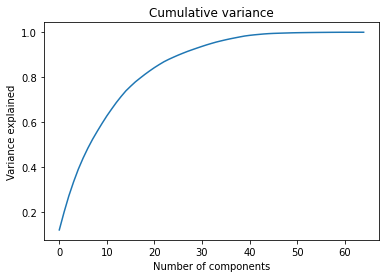

In [14]:
#%% PCA
from sklearn.decomposition import PCA
PCA_df = PCA().fit(scaled_df)
pca_df = PCA_df.transform( scaled_df)

cumvar = np.cumsum(PCA_df.explained_variance_ratio_)

n_comp =  np.argmax(cumvar > .9)

#Plotting cumulative variance
plt.plot(cumvar)
plt.title('Cumulative variance')
plt.xlabel('Number of components')
plt.ylabel('Variance explained')
print(f"{cumvar[n_comp]} expressed by {n_comp} components")

In [15]:
#%%
X_pca = np.dot(scaled_df, PCA_df.components_[:n_comp,:].T)
X_pca = pd.DataFrame(X_pca, columns=["PC%d" % (x + 1) for x in range(n_comp)])
X_pca.shape


(12330, 26)

In [16]:
#%% SMOTE TO BALANCE LABEL
import imblearn
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold

seed = 13
sm = SMOTE(random_state = seed)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train.ravel())
#pd.Series(y_train_smote).value_counts().plot.bar()
y_train_smote = pd.Series(y_train_smote)

In [17]:
#%% MODELS

from sklearn.model_selection import (
    KFold,
    ShuffleSplit,
    StratifiedKFold,
    GroupShuffleSplit,
    GroupKFold,
    StratifiedShuffleSplit,
    StratifiedGroupKFold,
)
rng = np.random.RandomState(1338)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

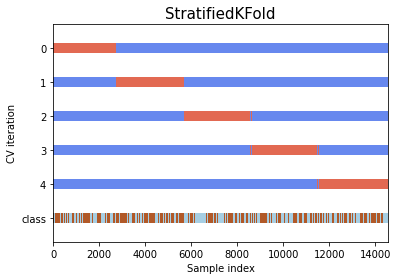

In [18]:
#%%
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
# define model
lr = LogisticRegression(random_state=seed, class_weight=None)
accuracies=[]
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0
        
        # lg1.fit(X.iloc[tr], y.iloc[tr])
        # y_pred = lg1.predict(X.iloc[tt])
        
        # print(f'Accuracy Score: {accuracy_score(y.iloc[tt],y_pred)}')
        # accuracies.append(accuracy_score(y.iloc[tt],y_pred))
        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )


    # Formatting
    yticklabels = list(range(n_splits)) + ["class"]
    ax.set(
        yticks=np.arange(n_splits + 1) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 1.2, -0.2],
        xlim=[0, X.shape[0]],
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax


fig, ax = plt.subplots()
n_splits=5
cv = StratifiedKFold(n_splits, shuffle=False)
X_train_smote, y_train_smote = shuffle(X_train_smote, y_train_smote)
plot_cv_indices(cv, X_train_smote, y_train_smote, y_train_smote, ax, n_splits)


In [19]:
models = {'LR': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'SVM': SVC(),
          'RF': RandomForestClassifier()}

hyperparams = {}


# define grid search
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
gridLR = dict(solver=solvers,penalty=penalty,C=c_values)
hyperparams['LR'] = gridLR

# define grid search
n_neighbors = range(1, 10)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# define grid search
gridKNN = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

hyperparams['KNN'] = gridKNN

# define grid search
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

# define grid search
gridSVM = dict(kernel=kernel,C=C,gamma=gamma)

hyperparams['SVM'] = gridSVM

# define grid search
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']


# define grid search
gridRF = dict(n_estimators=n_estimators,max_features=max_features)

hyperparams['RF'] = gridRF

results= {}
                    

In [36]:
def training (model_name, models, X_train, y_train, X_test, n_splits, hyperparams, smote=True):

  if model_name not in models.keys():
    print(models.values())
    raise('Value Error: Specify a valid model (LR, KNN, SVM, RF)')
  
    
  
  results_model = {}
  model = models[model_name]
  print("Model name: ", model_name)
  results[model_name] = {}
  grid = hyperparams[model_name]

  
  #Tuning hyperparameters
  cv = StratifiedKFold(n_splits, shuffle=False)
  print(model.get_params().keys())
  grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0, verbose = 10)
  grid_result = grid_search.fit(X_train, y_train)


  results_model['best_params'] =  grid_result.best_params_

  #Testing with best params found
  results_model['y_pred'] = grid_search.predict(X_test)

  # summarize results
  print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

  means = grid_result.cv_results_['mean_test_score']
  stds = grid_result.cv_results_['std_test_score']
  params = grid_result.cv_results_['params']
  for mean, stdev, param in zip(means, stds, params):
      print("%f (%f) with: %r" % (mean, stdev, param))

  return results_model


model_name = 'RF'
results[model_name] = training(model_name, models, X_train_smote, y_train_smote, X_test, 10, hyperparams, results )




Model name:  RF
dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best: 0.932734 using {'max_features': 'sqrt', 'n_estimators': 1000}
0.927031 (0.008715) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.932116 (0.007993) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.932734 (0.006747) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.926618 (0.006593) with: {'max_features': 'log2', 'n_estimators': 10}
0.931222 (0.008752) with: {'max_features': 'log2', 'n_estimators': 100}
0.932666 (0.007435) with: {'max_features': 'log2', 'n_estimators': 1000}


In [37]:
results['RF'].keys()


dict_keys(['best_params', 'y_pred'])

In [42]:
from sklearn.metrics import classification_report

for model_name in ['LR', 'KNN', 'SVM', 'RF']:
  print(model_name)
  results[model_name]['results'] = classification_report(y_test, results[model_name]['y_pred'], output_dict=True)
  print(cr)

LR
{'0': {'precision': 0.9505404520144121, 'recall': 0.9227344992050874, 'f1-score': 0.936431106808648, 'support': 3145}, '1': {'precision': 0.6238390092879257, 'recall': 0.7274368231046932, 'f1-score': 0.6716666666666666, 'support': 554}, 'accuracy': 0.8934847256015139, 'macro avg': {'precision': 0.7871897306511688, 'recall': 0.8250856611548902, 'f1-score': 0.8040488867376574, 'support': 3699}, 'weighted avg': {'precision': 0.9016103089296666, 'recall': 0.8934847256015139, 'f1-score': 0.8967772814940609, 'support': 3699}}
KNN
{'0': {'precision': 0.9505404520144121, 'recall': 0.9227344992050874, 'f1-score': 0.936431106808648, 'support': 3145}, '1': {'precision': 0.6238390092879257, 'recall': 0.7274368231046932, 'f1-score': 0.6716666666666666, 'support': 554}, 'accuracy': 0.8934847256015139, 'macro avg': {'precision': 0.7871897306511688, 'recall': 0.8250856611548902, 'f1-score': 0.8040488867376574, 'support': 3699}, 'weighted avg': {'precision': 0.9016103089296666, 'recall': 0.893484725

In [47]:
results['SVM']['results']

{'0': {'f1-score': 0.9188316927545587,
  'precision': 0.9328309305373526,
  'recall': 0.9052464228934817,
  'support': 3145},
 '1': {'f1-score': 0.5811823480432973,
  'precision': 0.5394126738794436,
  'recall': 0.6299638989169675,
  'support': 554},
 'accuracy': 0.8640173019735063,
 'macro avg': {'f1-score': 0.750007020398928,
  'precision': 0.7361218022083981,
  'recall': 0.7676051609052246,
  'support': 3699},
 'weighted avg': {'f1-score': 0.8682618801105904,
  'precision': 0.8739085963420344,
  'recall': 0.8640173019735063,
  'support': 3699}}

In [41]:
cr['accuracy'], cr['weighted avg']['precision'], cr['weighted avg']['recall'], cr['weighted avg']['f1-score']

(0.8934847256015139,
 0.9016103089296666,
 0.8934847256015139,
 0.8967772814940609)

In [50]:
# # example of grid searching key hyperparametres for logistic regression
# from sklearn.datasets import make_blobs
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression

# # define models and parameters
# LR = LogisticRegression()
# solvers = ['newton-cg', 'lbfgs', 'liblinear']
# penalty = ['l2']
# c_values = [100, 10, 1.0, 0.1, 0.01]

# # define grid search
# grid = dict(solver=solvers,penalty=penalty,C=c_values)
# cv = StratifiedKFold(n_splits, shuffle=False)
# LRgrid_search = GridSearchCV(estimator=LR, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0, verbose = 10)
# grid_result = LRgrid_search.fit(X_train_smote, y_train_smote)


# results['LR']['best_params'] =  grid_result.best_params_
# results['LR']['y_pred'] = LRgrid_search.predict(X_test)

# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))


Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best: 0.866978 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.863611 (0.005806) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.863886 (0.005042) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.863611 (0.005806) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.863817 (0.005787) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.864161 (0.005534) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.863817 (0.005651) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.865947 (0.005591) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.865947 (0.005587) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.866085 (0.006020) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.866978 (0.006777) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.866978 (0.006777) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.865878 (0.006101) with: {'C': 0.1, 'p

In [53]:
#  accuracy_score(y_test,results['LR']['y_pred'])

0.8550959718842931

In [60]:
# #%%
# # example of grid searching key hyperparametres for KNeighborsClassifier
# # from sklearn.datasets import make_blobs
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.model_selection import GridSearchCV
# from sklearn.neighbors import KNeighborsClassifier

# # define models and parameters
# KNN = KNeighborsClassifier()
# n_neighbors = range(1, 10)
# weights = ['uniform', 'distance']
# metric = ['euclidean', 'manhattan', 'minkowski']

# # define grid search
# grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
# cv = StratifiedKFold(n_splits, shuffle=False)
# KNNgrid_search = GridSearchCV(estimator=KNN, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0, verbose=10)
# grid_result = KNNgrid_search.fit(X_train_smote, y_train_smote)

# results['KNN']['best_params'] =  grid_result.best_params_
# results['KNN']['y_pred'] = KNNgrid_search.predict(X_test)

# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best: 0.906486 using {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}
0.884019 (0.006387) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.884019 (0.006387) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.892951 (0.003928) with: {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
0.884019 (0.006387) with: {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
0.866291 (0.008452) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.870551 (0.008756) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.880239 (0.007059) with: {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}
0.873506 (0.008200) with: {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
0.859764 (0.007506) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.866772 (0.008092) with: {'metric': 'e

In [61]:
#  accuracy_score(y_test,results['KNN']['y_pred'])

0.8469856718031901

In [63]:
# #%%

# # example of grid searching key hyperparametres for SVC
# from sklearn.datasets import make_blobs
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC

# # define model and parameters
# SVM = SVC()
# kernel = ['poly', 'rbf', 'sigmoid']
# C = [50, 10, 1.0, 0.1, 0.01]
# gamma = ['scale']

# # define grid search
# grid = dict(kernel=kernel,C=C,gamma=gamma)
# #cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# SVMgrid_search = GridSearchCV(estimator=SVM, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = SVMgrid_search.fit(X_train_smote, y_train_smote)

# results['SVM']['best_params'] =  grid_result.best_params_
# results['SVM']['y_pred'] = SVMgrid_search.predict(X_test)

# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.913769 using {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.899684 (0.003314) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.912326 (0.004639) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.720557 (0.012080) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.904768 (0.006486) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.913769 (0.006709) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.721176 (0.011650) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.887797 (0.008752) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.897073 (0.008220) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.723924 (0.010409) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.835577 (0.011697) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.861550 (0.007499) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.741033 (0.009856) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.686958 (0.008098) with: {'C': 0.01, 'gamma': 'scale', 

In [64]:
#  accuracy_score(y_test,results['SVM']['y_pred'])

0.8640173019735063

In [65]:
# # example of grid searching key hyperparameters for RandomForestClassifier
# from sklearn.datasets import make_blobs
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier


# # define models and parameters
# RF = RandomForestClassifier()
# n_estimators = [10, 100, 1000]
# max_features = ['sqrt', 'log2']

# # define grid search
# grid = dict(n_estimators=n_estimators,max_features=max_features)

# RFgrid_search = GridSearchCV(estimator=RF, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = RFgrid_search.fit(X_train_smote, y_train_smote)

# results['RF']['best_params'] =  grid_result.best_params_

# results['RF']['y_pred'] = RFgrid_search.predict(X_test)

# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.932733 using {'max_features': 'log2', 'n_estimators': 100}
0.921877 (0.003381) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.929710 (0.004204) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.930878 (0.004528) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.923182 (0.004298) with: {'max_features': 'log2', 'n_estimators': 10}
0.932733 (0.005002) with: {'max_features': 'log2', 'n_estimators': 100}
0.931015 (0.004167) with: {'max_features': 'log2', 'n_estimators': 1000}


In [67]:
#  accuracy_score(y_test,results['RF']['y_pred'])

0.8902406055690727

In [88]:
print(np.argsort(RFgrid_search.best_estimator_.feature_importances_))
RFgrid_search.best_estimator_.feature_importances_
X_train_smote.columns[59]

[31 20 30 48 34 28 42 55 17 14  4 13  6 39 33 10 27 56 41 35  0 44 23 25
  1 18 45 47 16 26 32 15 57 21 51  8 38  9 36 19 22 29  2 52 43  5 60 49
 11 24  7 54 12  3 46 40 53 37 50 63 58 59 61 62]


'ProductRelated'

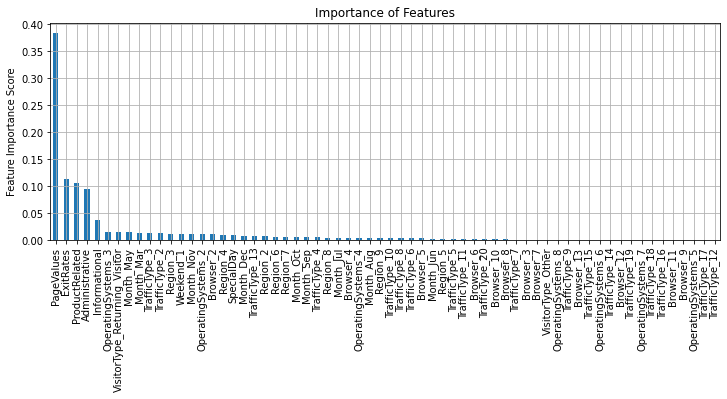

In [89]:
feat_imp = pd.Series(RFgrid_search.best_estimator_.feature_importances_, list(X_train_smote)).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 4))
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
plt.grid()
plt.show()

In [28]:
# # Testing
# params_LR = {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
# params_KNN = {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
# params_SVM = {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
# params_RF = {'max_features': 'log2', 'n_estimators': 100}

# LR = LogisticRegression().set_params(**params_LR)
# KNN = KNeighborsClassifier().set_params(**params_KNN)
# SVM = SVC().set_params(**params_SVM)
# RF = RandomForestClassifier().set_params(**params_RF)

In [32]:
# y_pred_LR = LR.predict(X_test)
# y_pred_KNN = KNN.predict(X_test)
# y_pred_SVM = SVM.predict(X_test)
# y_pred_RF = RF.predict(X_test)

# results = {}
# results['LR'] = {}
# results['LR']['accuracy'] = accuracy_score(y_test,y_pred_LR)

# results['KNN'] = {}
# results['KNN']['accuracy'] = accuracy_score(y_test,y_pred_KNN)
# results['SVM'] = {}
# results['SVM']['accuracy'] = accuracy_score(y_test,y_pred_SVM)
# results['RF'] = {}
# results['RF']['accuracy'] = accuracy_score(y_test,y_pred_RF)

NotFittedError: ignored